In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [32]:
data = pd.read_csv('kaggle_student_clear.csv', encoding = 'latin-1', sep = ';', 
                   decimal = ',', na_values = '---')

In [33]:
data.head()

,Unnamed: 0,X,Institution,Course.Number,month,date,year,semester,Course.Title,Instructors,...,X..Played.Video,X..Posted.in.Forum,X..Grade.Higher.Than.Zero,Total.Course.Hours..Thousands.,Median.Hours.for.Certification,Median.Age,X..Male,X..Female,X..Bachelor.s.Degree.or.Higher,drop_outs
0,1,1,MITx,6.002x,9,5,2012,Fall,Circuits and Electronics,Khurram Afridi,...,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68,27671
1,2,2,MITx,6.00x,9,26,2012,Fall,Introduction to Computer Science and Programming,Eric Grimson,...,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04,47977
2,3,3,MITx,6.00x,9,26,2012,Fall,Introduction to Computer Science and Programming,John Guttag,...,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04,47977
3,4,4,MITx,6.00x,9,26,2012,Fall,Introduction to Computer Science and Programming,Chris Terman,...,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04,47977
4,5,5,MITx,3.091x,10,9,2012,Fall,Introduction to Solid State Chemistry,Michael Cima,...,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76,11726


In [34]:
data['X..Played.Video'] = data['X..Played.Video'].astype('float64')

In [35]:
data = data.dropna()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 515
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     515 non-null    int64  
 1   X                                              515 non-null    int64  
 2   Institution                                    515 non-null    object 
 3   Course.Number                                  515 non-null    object 
 4   month                                          515 non-null    int64  
 5   date                                           515 non-null    int64  
 6   year                                           515 non-null    int64  
 7   semester                                       515 non-null    object 
 8   Course.Title                                   515 non-null    object 
 9   Instructors                                    515 non

Выбранный набор данных размещен: https://www.kaggle.com/kanikanarang94/mooc-kaggle-dataset

Набор данных посвящен MOOC-образованию (от англ. «Massive Open Online Coursers») и охватывает платформу edX – совместный образовательный проект ученых Массачусетского технологического университета и Гарвардского университета, основанный в 2012 году.  
Данные, представленные в наборе, относятся к периоду с 2012 по 2016 годы.


Описание переменных:
1. X - Обозначение курса.
2. Institution - Обозначение университета, в котором проводился курс.
3. Course.Number - Уникальный номер курса.
4. month - Номер месяца, в котором начинался курс.
5. date - Дата, в которую начинался курс.
6. year - Год, в котором начинался курс.
7. semester - Семестр, в котором проводился курс.
8. Course.Title - Название курса.
9. Instructors - ФИ преподавателей курса.
10. Course.Subject - Области знаний, в рамках которых проводился курс.
11. Year - Номер года обучения, в котором следует изучать данный курс.
12. Honor.Code.Certificates - Показывает возможность получения бесплатного сертификата.
13. Participants..Course.Content.Accessed. - Количество зарегистрированных учащихся на курс.
14. Audited....50..Course.Content.Accessed. - Количество учащихся, которые прошли 50% курса.
15. Certified - Количество студентов, которые получили сертификат.
16. X..Audited - Доля тех, кто прошел ½ курса к общему количеству зарегистрированных учащихся (в %).
17. X..Certified - Доля тех, кто получил сертификат к общему количеству зарегистрированных учащихся (в %).
18. X..Certified.of..50.Course.Content.Accessed - Доля тех, кто получил сертификат среди тех, кто прошел ½ курса (в %).
19. X..Played.Video - Доля тех, кто просматривал видео курса к общему количеству зарегистрированных учащихся (в %).
20. X..Posted.in.Forum - Доля тех, кто писал на форуме курса к общему количеству зарегистрированных учащихся (в %).
21. X..Grade.Higher.Than.Zero - Доля тех, кто завершил курс с баллами больше «0» к общему количеству зарегистрированных учащихся (в %).
22. Total.Course.Hours..Thousands. - Количество часов (в тыс.), которые потратили на курс все зарегистрированные учащиеся.
23. Median.Hours.for.Certification - Среднее значение часов, которое нужно потратить для того, чтобы получить сертификат.
24. Median.Age - Среднее значение (медиана) возраста всех зарегистрированных учащихся на курс.
25. X..Male - Доля мужчин к общему количеству зарегистрированных учащихся (в %).
26. X..Female - Доля женщин к общему количеству зарегистрированных учащихся (в %).
27. X..Bachelors.Degree.or.Higher -  Доля тех, кто имеет хотя бы степень бакалавра к общему количеству зарегистрированных учащихся (в %).
28. drop_outs - Количество учащихся, которые бросили курс.














## <center> Графики

### <center> График № 1

Тип переменной - числовая.
Для одной переменной характер распределения данных удобнее всего смотреть на гистограмме.

Text(0, 0.5, 'Количество курсов')

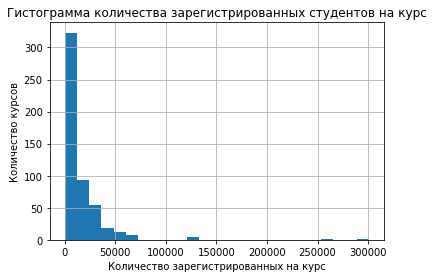

In [37]:
ax = data['Participants..Course.Content.Accessed.'].hist(bins = 25)
ax.set_title('Гистограмма количества зарегистрированных студентов на курс')
ax.set_xlabel('Количество зарегистрированных на курс')
ax.set_ylabel('Количество курсов')

### <center> График № 2

Видно, что есть отдельные курсы с большим количеством зарегистрированных пользователей. Для того, чтобы в этом убедиться, построим диаграмму размаха (boxplot)

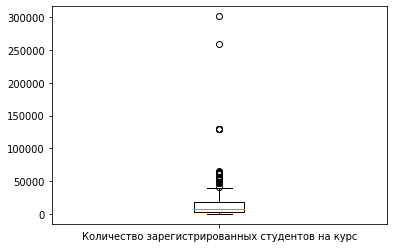

In [38]:
plt.boxplot((data['Participants..Course.Content.Accessed.']), 
            notch = False, sym = 'o', 
            labels = ['Количество зарегистрированных студентов на курс'])
plt.show()

Определим курсы, на которые было зарегистрировано очень большое количество студентов (>100000).

In [39]:
data_2 = data[data['Participants..Course.Content.Accessed.'] > 100000]
data_2.head(10)

,Unnamed: 0,X,Institution,Course.Number,month,date,year,semester,Course.Title,Instructors,...,X..Played.Video,X..Posted.in.Forum,X..Grade.Higher.Than.Zero,Total.Course.Hours..Thousands.,Median.Hours.for.Certification,Median.Age,X..Male,X..Female,X..Bachelor.s.Degree.or.Higher,drop_outs
5,6,6,HarvardX,CS50x,10,15,2012,Fall,Introduction to Computer Science,David Malan,...,0.00,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78,115073
6,7,7,HarvardX,CS50x,10,15,2012,Fall,Introduction to Computer Science,Nate Hardison,...,0.00,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78,115073
7,8,8,HarvardX,CS50x,10,15,2012,Fall,Introduction to Computer Science,Rob Bowden,...,0.00,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78,115073
8,9,9,HarvardX,CS50x,10,15,2012,Fall,Introduction to Computer Science,Tommy MacWilliam,...,0.00,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78,115073
9,10,10,HarvardX,CS50x,10,15,2012,Fall,Introduction to Computer Science,Zamyla Chan,...,0.00,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78,115073
63,64,64,HarvardX,CS50x,1,1,2014,Spring,Introduction to Computer Science,David Malan,...,72.41,0.0,0.00,853.36,0.0,27.0,77.89,22.11,54.82,235475
155,156,156,HarvardX,CS50x,1,1,2015,Spring,Introduction to Computer Science,David Malan,...,67.80,0.0,0.00,275.96,0.0,25.0,77.68,22.32,51.95,273922


Самый популярный у студентов курс проводился одним и тем же университетом и был посвящен одной и той же тематике - Introduction to Computer Science. Данный курс был популярен с 2012 по 2015 год вне зависимости от преподавателей на курсе.

### <center> График № 3

Построим график средних значений доли успешно завершивсших курс по областям знаний и по годам.

Тип переменных:
* год - категориальная;
* область знаний - категориальная;
* доля студентов, получивших сертификат - числовая.

Тип графика выбран такой, потому что необходимо посмотреть динамику доли студентов, успешно завершивших курс, по годам и по областям знаний.

In [40]:
data['Course.Subject'].unique()

array(['Science, Technology, Engineering, and Mathematics',
       'Computer Science', 'Government, Health, and Social Science',
       'Humanities, History, Design, Religion, and Education'],
      dtype=object)

In [41]:
year_subject_success = data.pivot_table(
                        index='year', 
                        columns='Course.Subject', 
                        values='X..Certified', 
                        aggfunc= 'mean').fillna(0).applymap(float)

year_subject_success

Course.Subject,Computer Science,"Government, Health, and Social Science","Humanities, History, Design, Religion, and Education","Science, Technology, Engineering, and Mathematics"
year,,,,
2012,4.151250,9.640000,0.000000,10.405000
2013,7.496667,8.899286,5.597500,6.719600
2014,7.641818,10.370000,18.066500,3.411364
2015,6.219130,9.654464,12.890862,4.407465
2016,2.520000,6.931020,2.587619,1.798906


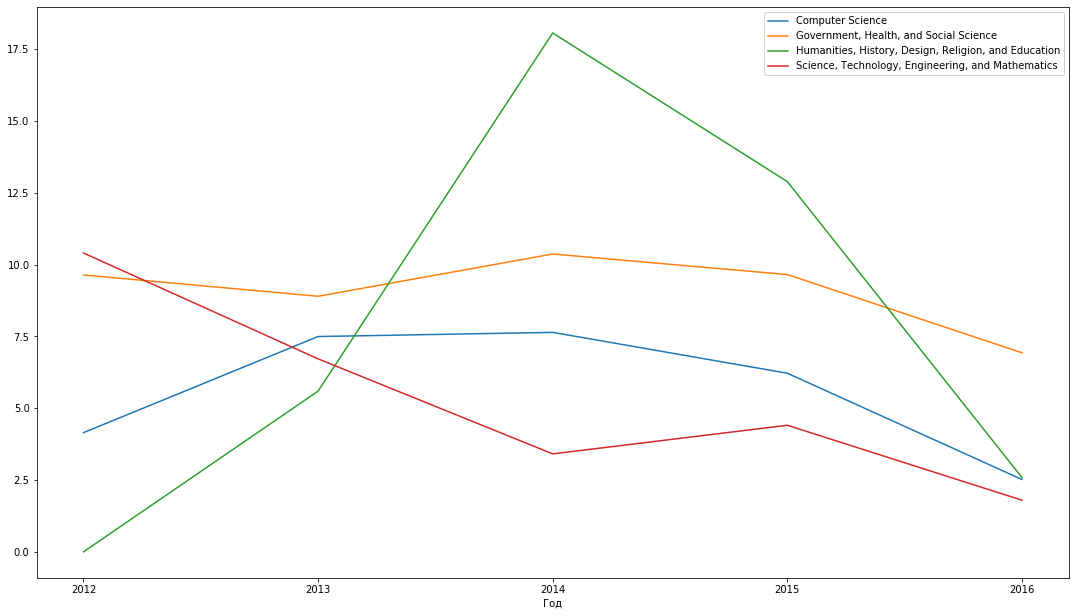

In [42]:
ax = year_subject_success.plot()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.legend(loc = 'upper right')
ax.set_xlabel('Год')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

Доля студентов, успешно завершивших курс, сначала возрастала, а после 2014 года стала убывать. Науки о здоровье, гос. управлении и соц. науки за весь период находятся примерно на одном и том же уровне.

### <center> График № 4

Построим диаграмму размаха медианного значения трудоемкости курса по различным областям знаний.

Тип переменных:
* медианное значение трудоемкости - числовая;
* область знаний - категориальная.

Тип графика выбран в связи с тем, что boxplot позволяет сравнить значения трудоемкости для категорий областей знаний.

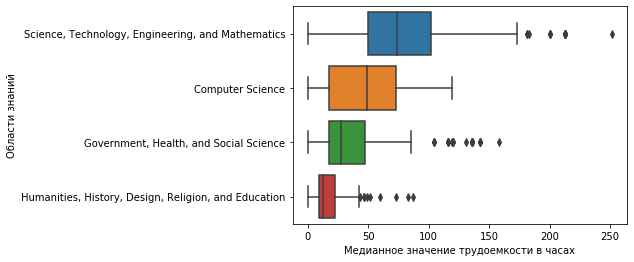

In [43]:
ax = sns.boxplot(x = 'Median.Hours.for.Certification', y = 'Course.Subject', 
            data = data)
ax.set_xlabel('Медианное значение трудоемкости в часах')
ax.set_ylabel('Области знаний')
plt.show()

Самыми трудоемкими являются курсы инженерной направленности, на втором месте находятся курсы о компьютерных науках.  
Можно объянсить низкий процент слушателей, завершивших курс, в том числе и большой трудоемкостью курса.

Посмотри на самый "зубодробительный" курс

In [44]:
data_3 = data[data['Median.Hours.for.Certification'] > 240]
data_3

,Unnamed: 0,X,Institution,Course.Number,month,date,year,semester,Course.Title,Instructors,...,X..Played.Video,X..Posted.in.Forum,X..Grade.Higher.Than.Zero,Total.Course.Hours..Thousands.,Median.Hours.for.Certification,Median.Age,X..Male,X..Female,X..Bachelor.s.Degree.or.Higher,drop_outs
183,184,184,MITx,8.05x,2,10,2015,Spring,Mastering Quantum Mechanics,Barton Zwiebach,...,71.33,8.03,16.57,187.44,251.82,26.0,87.19,12.81,64.49,9346


In [45]:
data_3['X..Certified']

183    3.59
Name: X..Certified, dtype: float64

Да, квантовая механика - это жестко.

### <center> График № 5

Построим диаграмму рассеивания, чтобы проверить свое предположение о том, что с увеличением трудоемкости курса уменьшается процент слушателей, успешно завершивших курс.

Тип переменных:
* медианное значение трудоемкости - числовая;
* доля студентов, получивших сертификат - числовая.

Диаграмма рассеивания выбрана для того, чтобы посмотреть взаимосвязь между двумя числовыми переменными.

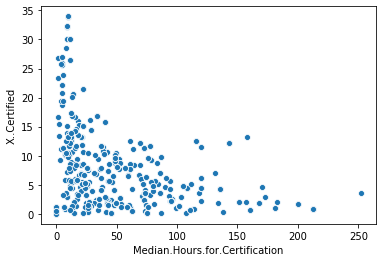

In [46]:
ax = sns.scatterplot(x = 'Median.Hours.for.Certification', y = 'X..Certified', data = data)

Предположение верно.  
Посмотрим на самый "лайтовый" курс.

In [47]:
data_4 = data[data['X..Certified'] > 30]
data_4

,Unnamed: 0,X,Institution,Course.Number,month,date,year,semester,Course.Title,Instructors,...,X..Played.Video,X..Posted.in.Forum,X..Grade.Higher.Than.Zero,Total.Course.Hours..Thousands.,Median.Hours.for.Certification,Median.Age,X..Male,X..Female,X..Bachelor.s.Degree.or.Higher,drop_outs
73,74,74,HarvardX,SW12.3x,2,13,2014,Spring,Cosmopolitan Tang: Aristocratic Culture,Peter Bol,...,77.16,29.14,50.29,33.76,8.99,34.0,58.97,41.03,79.40,1975
74,75,75,HarvardX,SW12.3x,2,13,2014,Spring,Cosmopolitan Tang: Aristocratic Culture,Bill Kirby,...,77.16,29.14,50.29,33.76,8.99,34.0,58.97,41.03,79.40,1975
101,102,102,HarvardX,SW12.5x,4,24,2014,Spring,From Global Empire to Global Economy,Peter Bol,...,75.32,28.69,48.95,24.76,9.09,35.0,64.35,35.65,82.04,921
102,103,103,HarvardX,SW12.5x,4,24,2014,Spring,From Global Empire to Global Economy,Bill Kirby,...,75.32,28.69,48.95,24.76,9.09,35.0,64.35,35.65,82.04,921
105,106,106,HarvardX,SW12.6x,5,22,2014,Summer,The Last Empire,Peter Bol,...,76.75,24.22,49.72,31.69,11.70,35.0,60.97,39.03,80.56,1565
106,107,107,HarvardX,SW12.6x,5,22,2014,Summer,The Last Empire,Bill Kirby,...,76.75,24.22,49.72,31.69,11.70,35.0,60.97,39.03,80.56,1565
126,127,127,HarvardX,SW12.7x,9,4,2014,Fall,"Invasions, Rebellions, and the end of Imperial...",Peter Bol,...,80.08,33.98,52.26,22.93,8.68,38.0,63.87,36.13,82.25,1009
127,128,128,HarvardX,SW12.7x,9,4,2014,Fall,"Invasions, Rebellions, and the end of Imperial...",Bill Kirby,...,80.08,33.98,52.26,22.93,8.68,38.0,63.87,36.13,82.25,1009
143,144,144,HarvardX,SW12.8x,10,9,2014,Fall,Creating China: The Birth of a Nation,Peter Bol,...,78.36,31.46,51.05,23.92,9.54,37.0,64.33,35.67,82.68,906
144,145,145,HarvardX,SW12.8x,10,9,2014,Fall,Creating China: The Birth of a Nation,Bill Kirby,...,78.36,31.46,51.05,23.92,9.54,37.0,64.33,35.67,82.68,906


In [48]:
data_4['Course.Subject'].unique()

array(['Humanities, History, Design, Religion, and Education'],
      dtype=object)

Самыми успешными (по количество студентов, которые завершили начатый курс) являются курсы в области гуманитарных наук.

### <center> График № 6

Построим коррялиционную матрицу, для того, чтобы определить, какие параметры влияют на успешное завершение курса (получение сертификата).

In [49]:
data_5 = data[['Year', 'Honor.Code.Certificates',
              'X..Audited', 'X..Certified', 'X..Played.Video', 'X..Posted.in.Forum',
              'Median.Hours.for.Certification', 'Median.Age', 'X..Bachelor.s.Degree.or.Higher']]
data_5.head()

,Year,Honor.Code.Certificates,X..Audited,X..Certified,X..Played.Video,X..Posted.in.Forum,Median.Hours.for.Certification,Median.Age,X..Bachelor.s.Degree.or.Higher
0,1,1,15.04,8.32,83.20,8.17,64.45,26.0,60.68
1,1,1,14.27,9.22,89.14,14.38,78.53,28.0,63.04
2,1,1,14.27,9.22,89.14,14.38,78.53,28.0,63.04
3,1,1,14.27,9.22,89.14,14.38,78.53,28.0,63.04
4,1,1,17.13,12.49,87.49,14.42,61.28,27.0,58.76


Тип переменных:

In [50]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 515
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            515 non-null    int64  
 1   Honor.Code.Certificates         515 non-null    int64  
 2   X..Audited                      515 non-null    float64
 3   X..Certified                    515 non-null    float64
 4   X..Played.Video                 515 non-null    float64
 5   X..Posted.in.Forum              515 non-null    float64
 6   Median.Hours.for.Certification  515 non-null    float64
 7   Median.Age                      515 non-null    float64
 8   X..Bachelor.s.Degree.or.Higher  515 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 60.2 KB


Коррялиционная матрица выбрана для того, чтобы посмотреть взаимосвязь между несколькоми числовыми переменными.

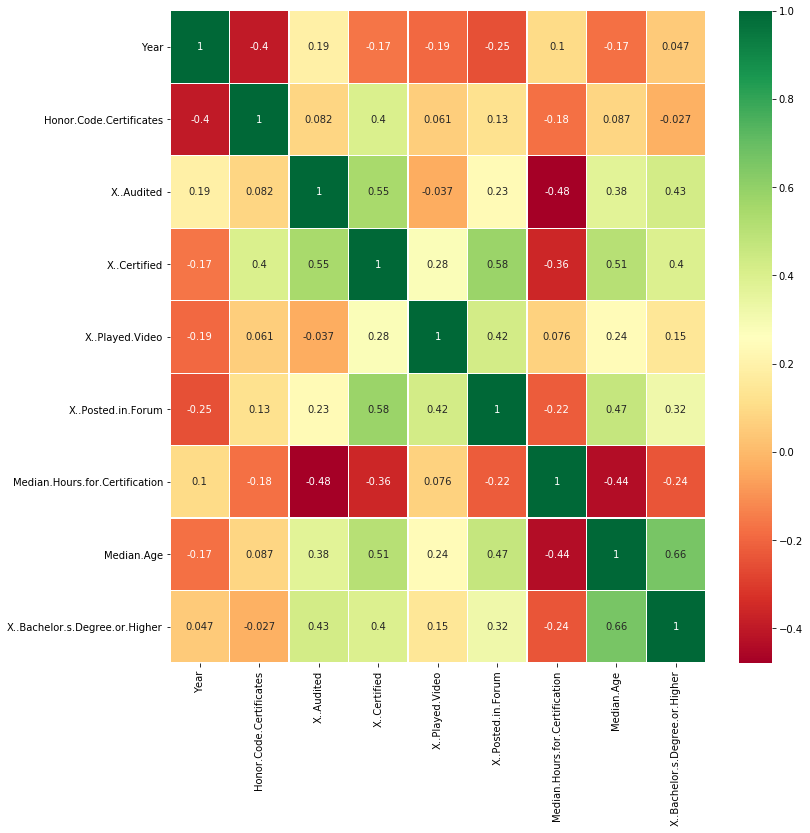

In [51]:
sns.heatmap(data_5.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2) 
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Переменные, которые предопределяют успешное завершение курса:
* доля тех, кто писал на форуме курса к общему количеству зарегистрированных учащихся (в %);
* доля тех, кто прошел ½ курса к общему количеству зарегистрированных учащихся (в %);
* среднее значение возраста всех зарегистрированных учащихся на курс.

Переменные, которые предопределяют вероятный провал курса:
* среднее значение часов, которое нужно потратить для того, чтобы получить сертификат.


### <center> График № 7

Построим диаграммы размаха доли успешно завершивших курс в зависимости от семестра, в котором изучался курс.

Тип переменных:
* доля студентов, получивших сертификат - числовая;
* семестр - категориальная.

In [52]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [53]:
df = []
for sem in data['semester'].unique():
    df.append(
        go.Box(y = data[data['semester'] == sem]['X..Certified'], 
               name = sem)
    )
iplot(df, show_link = False)

Можно предположить, что в осенний семестр доля студентов, успешно завершивших курс, выше, чем в весенний и летний семестры.